In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from  sklearn.utils import shuffle
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv('test.csv'))

In [4]:
train.isnull().values.any()

False

In [5]:
test.isnull().values.any()

False

In [6]:
train_outcomes = pd.crosstab(index=train['Activity'], columns="count")

In [7]:
train_outcomes

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [8]:
temp = train['Activity'].value_counts()
df = pd.DataFrame({'labels':temp.index, "values":temp.values} )

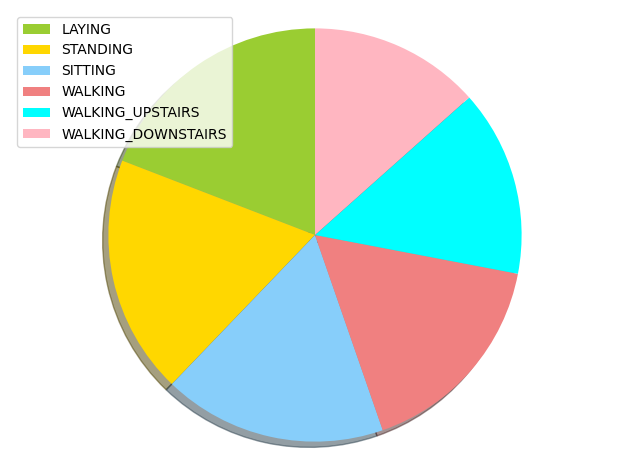

In [12]:
labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan', 'lightpink']
patches ,texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance = 1.1, labeldistance=1.2)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
X_train = pd.DataFrame(train.drop(['Activity', 'subject'], axis=1))
Y_train_label = train.Activity.values.astype(object)
X_test = pd.DataFrame(test.drop(['Activity', 'subject'], axis=1))
Y_test_label = test.Activity.values.astype(object)

In [14]:
X_train.shape

(7352, 561)

In [15]:
X_test.shape

(2947, 561)

In [16]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [17]:
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

In [18]:
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

In [19]:
num_cols = X_train._get_numeric_data().columns
print("Number of numeric columns:", num_cols.size)

Number of numeric columns: 561


In [20]:
names_of_predictors = list(X_train.columns.values)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
params_grid = [{'kernel':['rbf'], 'gamma':[1e-3,1e-4], 'C':[1,10,100,1000] },
               {'kernel': ['linear'], "C":[1,10,100,1000]}]

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
svm_model = GridSearchCV(SVC(), params_grid, cv = 5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [26]:
svm_model.best_score_

0.9887104427086948

In [27]:
svm_model.best_estimator_.C

1000

In [28]:
svm_model.best_estimator_.kernel

'rbf'

In [29]:
svm_model.best_estimator_.gamma

0.001

In [30]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test_label, Y_pred_label))
print("\n")
print(classification_report(Y_test_label, Y_pred_label))

print("Training set score for SVM: %f"% final_model.score(X_train_scaled, Y_train))
print("Testing set score for SVM:%f" % final_model.score(X_test_scaled, Y_test))

svm_model.score

[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  11 521   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.98      0.89      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing set score for SVM:0.958941


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>